In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

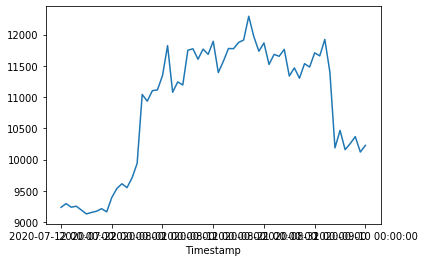

In [3]:
df = pd.read_csv('market-block.csv', header=0, index_col=0, squeeze=True)
df.plot()

In [4]:
df.shape

(61,)

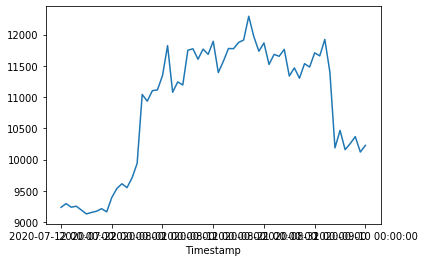

In [5]:
df.plot()
plt.show()

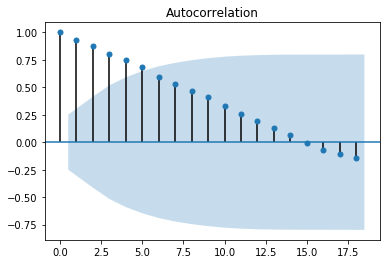

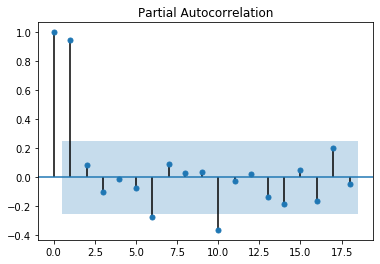

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df)
plot_pacf(df)
plt.show()

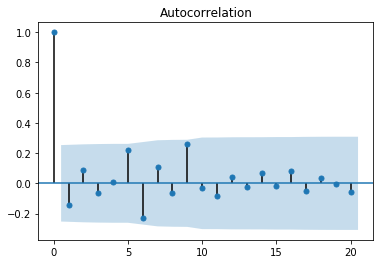

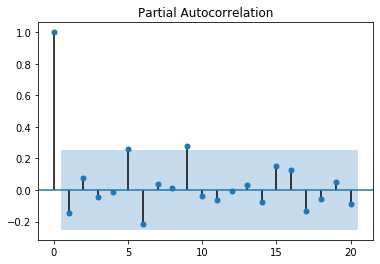

In [7]:
plot_acf(df.diff(periods=1).iloc[1:], lags=20) 
plot_pacf(df.diff(periods=1).iloc[1:], lags=20)
plt.show()

In [18]:
from pmdarima import auto_arima

auto_model= auto_arima(df, start_p =2,start_q = 2,test='adf',trace=True)

Performing stepwise search to minimize aic


C:\Users\ILIFO-006\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ILIFO-006\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ILIFO-006\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=864.389, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=865.430, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=865.522, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=862.554, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=867.224, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.732 seconds


In [21]:

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df, order=(0,1,1))


#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄 
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market-price   No. Observations:                   60
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -429.684
Method:                       css-mle   S.D. of innovations            311.792
Date:                Thu, 10 Sep 2020   AIC                            865.368
Time:                        17:09:41   BIC                            871.651
Sample:                    07-13-2020   HQIC                           867.825
                         - 09-10-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   16.3422     35.467      0.461      0.645     -53.173      85.857
ma.L1.D.market-price    -0.1209      0.119     -1.018      0.309      -0.354       0.112
            

C:\Users\ILIFO-006\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ILIFO-006\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


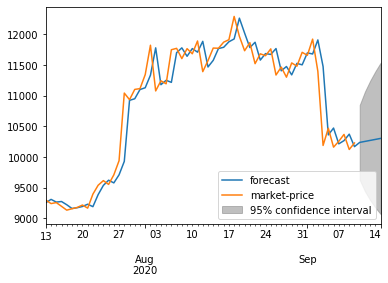

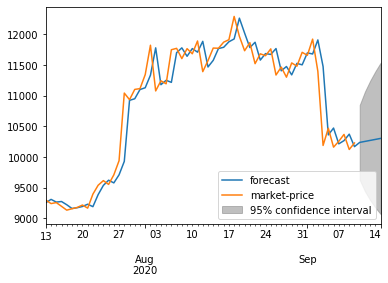

In [27]:
model_fit.plot_predict(1,65)
# fore = model_fit.forecast(steps=1)
# print(fore)

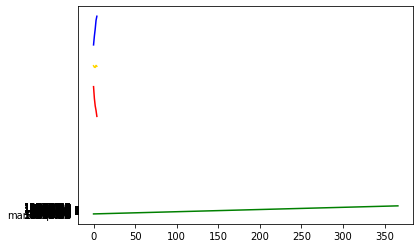

In [30]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
test_file_path = './market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [50]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.price.values, order=(5,1,5))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

AttributeError: 'Series' object has no attribute 'price'